## DataScience Hackathon - " A Network Analysis of Game of Thrones"
<p>Team Details: <b>Yash Chauhan</b> and <b>Vidhi Bhavsar</b><br/>Contact.no: 9925877996<br/>Email: yashy3045@gmail.com<br/><br/>Our Tasks <br/>(1)  First load the dataset<br/>(2) Time for some Network of Thrones<br/>(3) Populate the network with the DataFrame<br/>(4) The most important character in Game of Thrones<br/>(5) The evolution of character importance<br/>(6) What's up with Stannis Baratheon?<br/>(7) What does Google PageRank tell us about GoT?<br/>(8) Correlation between different measures<br/>(9) Conclusion<P>


In [48]:
#https://networkx.github.io/documentation/stable/auto_examples/index.html

In [49]:
#function created for the ease of code

#this functions are for geting the numbers of edges and nodes in a particular book. b=book

#edges_nodes_b1()
#edges_nodes_b2()
#edges_nodes_b3()
#edges_nodes_b4()
#edges_nodes_b5()


#this functions allows us to sort the data. It accepts an iterable and returns a sorted list containing the items from 
#the iterable. number at the last is the output character names values.

#srt_deg_cen_b1_10()
#srt_deg_cen_b5_10()
#srt_deg_cen_b1_5()
#srt_deg_cen_b5_5()


#for betweenness_centrality

#srt_btw_cen_b1_5()
#srt_btw_cen_b5_5()


#this function allow us to fetch the value from the list

#list_edges_b1(a) #"a" is the input, we need to enter the number that we want to get as a output.


#this function will replace all NaN elements with 0s.
#evol_fillna()

## 1. Importing the libraries and Loading the Dataset 

It'a stochastic graph generator


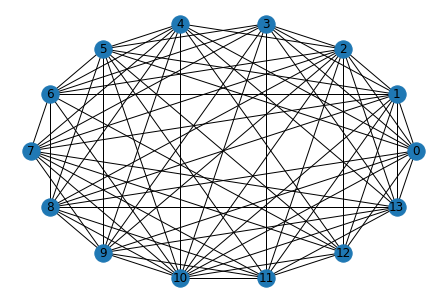

In [50]:
#Importing libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import community
import numpy as np
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

print("It'a stochastic graph generator")

nx.draw_circular(nx.erdos_renyi_graph(14, 0.7), with_labels=True)

#we can both erdos_renyi_graph(), binomial_graph(), fast_gnp_random_graph() function.
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html

#nx.draw_circular(nx.binomial_graph(14, 0.7), with_labels=True)

#This algorithm runs in O(n^2) time. 
#fast_gnp_random_graph() is a faster algorithm.

#nx.draw_circular(nx.fast_gnp_random_graph(14, 0.7), with_labels=True)


In [51]:
# Reading all the books.csv
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_csv.html

book1 = pd.read_csv('book1.csv')
book2 = pd.read_csv('book2.csv')
book3 = pd.read_csv('book3.csv')
book4 = pd.read_csv('book4.csv')
book5 = pd.read_csv('book5.csv')

#it will show you the whole table with rows and colums
book1.T


,0,1,2,3,4,5,6,7,8,9,...,674,675,676,677,678,679,680,681,682,683
Source,Addam-Marbrand,Addam-Marbrand,Aegon-I-Targaryen,Aegon-I-Targaryen,Aemon-Targaryen-(Maester-Aemon),Aemon-Targaryen-(Maester-Aemon),Aemon-Targaryen-(Maester-Aemon),Aemon-Targaryen-(Maester-Aemon),Aemon-Targaryen-(Maester-Aemon),Aemon-Targaryen-(Maester-Aemon),...,Timett,Tommen-Baratheon,Tyrion-Lannister,Tyrion-Lannister,Tyrion-Lannister,Tyrion-Lannister,Tyrion-Lannister,Tywin-Lannister,Tywin-Lannister,Waymar-Royce
Target,Jaime-Lannister,Tywin-Lannister,Daenerys-Targaryen,Eddard-Stark,Alliser-Thorne,Bowen-Marsh,Chett,Clydas,Jeor-Mormont,Jon-Snow,...,Tyrion-Lannister,Tyrion-Lannister,Tywin-Lannister,Vardis-Egen,Varys,Willis-Wode,Yoren,Varys,Walder-Frey,Will-(prologue)
Type,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,...,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected,Undirected
weight,3,6,5,4,4,4,9,5,13,34,...,3,3,40,9,3,4,10,4,8,18
book,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [52]:
# Printing out the head of the dataset by Viewing the first 5 lines
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [53]:
# Printing out the tail of the dataset by Viewing the last 5 lines
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
book1.tail()

,Source,Target,Type,weight,book
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1
683,Waymar-Royce,Will-(prologue),Undirected,18,1


## 2. Time for some Network of Thrones
</p>As a result we can by the above code we can observe that Dataset <b>book1</b> has 5 columns:<br/><b>Source</b><br/><b>Target</b><br/><b>Type</b><br/><b>weight</b><br/><b>book</b> <br/>Here <b>Source</b> and <b>target</b> are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.
So here to create some network we are going to use <b>networkx</b>. It’s a network analysis library.<p/>


In [54]:
# Creating a graph/network object
#https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>Let now populate it with the edges from <b>G_book1<b/>, <b>G_book2<b/>, <b>G_book3<b/>, <b>G_book4<b/>, <b>G_book5<b/></p>

In [55]:
#Iterating through the DataFrame to add edges of all the books. 
#Iterrows method returns a iterable object contains both index and row
for row in book1.iterrows():
    G_book1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

#books function created to access it easily    
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

In [56]:
#Print out some summary statistics before visualizing the graph.
def edges_nodes_b1():
    print("# of edges of book1: {}".format(G_book1.number_of_edges()))
    print("# of nodes of book1: {}".format(G_book1.number_of_nodes()))

def edges_nodes_b2():
    print("# of edges of book2: {}".format(G_book2.number_of_edges()))
    print("# of nodes of book2: {}".format(G_book2.number_of_nodes()))

def edges_nodes_b3():
    print("# of edges of book3: {}".format(G_book3.number_of_edges()))
    print("# of nodes of book3: {}".format(G_book3.number_of_nodes()))

def edges_nodes_b4():
    print("# of edges of book4: {}".format(G_book4.number_of_edges()))
    print("# of nodes of book4: {}".format(G_book4.number_of_nodes()))

def edges_nodes_b5():
    print("# of edges of book5: {}".format(G_book5.number_of_edges()))
    print("# of nodes of book5: {}".format(G_book5.number_of_nodes()))

edges_nodes_b1()
#edges_nodes_b2()
#edges_nodes_b3()
#edges_nodes_b4()
#edges_nodes_b5()

# of edges of book1: 684
# of nodes of book1: 187


In [57]:
#fetching the value from the list.
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.edges.html
def list_edges_b1(a):
    return list(G_book1.edges(data=True))[a]

list_edges_b1(16)

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3, 'book': 1})

## 4. Finding the most important character in Game of Thrones

<p>let's extract the top ten important characters from the first book and the fifth book.</p>

In [58]:
#Calculating the degree centrality of book 1, by giving them index VALUES.
#It will compute the degree centrality for nodes.
#https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.centrality.degree_centrality.html

deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])

In [59]:
#Sorting the dictionaries according to their degree centrality and storing the top 10
#allows us to sort the data. It accepts an iterable and returns a sorted list containing the items from the iterable. 
#By default, it sorts in ascending order.
#https://thepythonguru.com/python-builtin-functions/sorted/

#After creating the function this command will make our work easy and fast.

def srt_deg_cen_b1_10():
    return sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

def srt_deg_cen_b5_10():
    return sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

def srt_deg_cen_b1_5():
    return sorted(nx.degree_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[:5]

def srt_deg_cen_b5_5():
    return sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

#function to get the value of betweenness_centrality.

def srt_btw_cen_b1_5():
    return sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[:5]
    
def srt_btw_cen_b5_5():
    return sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]


In [60]:
srt_deg_cen_b1_10()

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [61]:
srt_deg_cen_b5_10()

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

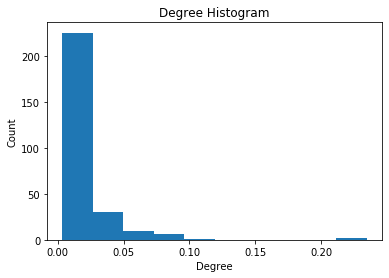

In [62]:

# Plot a histogram of degree centrality
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.hist(list(nx.degree_centrality(G_book4).values()))
plt.show()

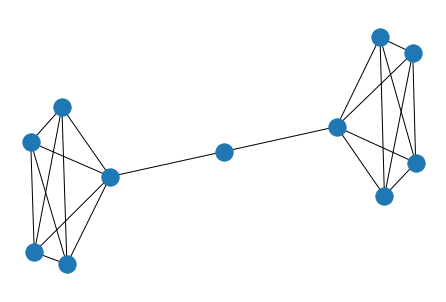

In [63]:
#Barbell Graph: two complete graphs connected by a path.
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.classic.barbell_graph.html

G = nx.barbell_graph(5, 1)
nx.draw(G)

## 5. Evolution of importance of characters over the books
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. </p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Robb Stark, Jon Snow, and Stannis Baratheon, which showed up in the top 10 of degree centrality in the first book.</p>

## Degree Centarlity

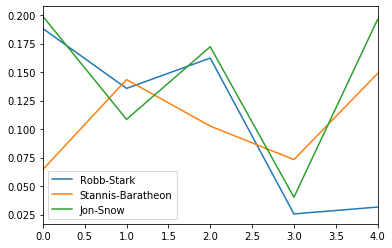

In [64]:
#Ploting the evolution of degree centrality of the above mentioned characters over the 5 books.
evol = [nx.degree_centrality(book) for book in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Robb-Stark', 'Stannis-Baratheon', 'Jon-Snow']].plot()

In [65]:
#getting the name of all the chracter. Finding the top characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))
set_of_char

{'Arya-Stark',
 'Brienne-of-Tarth',
 'Catelyn-Stark',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Snow',
 'Margaery-Tyrell',
 'Robb-Stark',
 'Robert-Baratheon',
 'Sansa-Stark',
 'Stannis-Baratheon',
 'Theon-Greyjoy',
 'Tyrion-Lannister'}

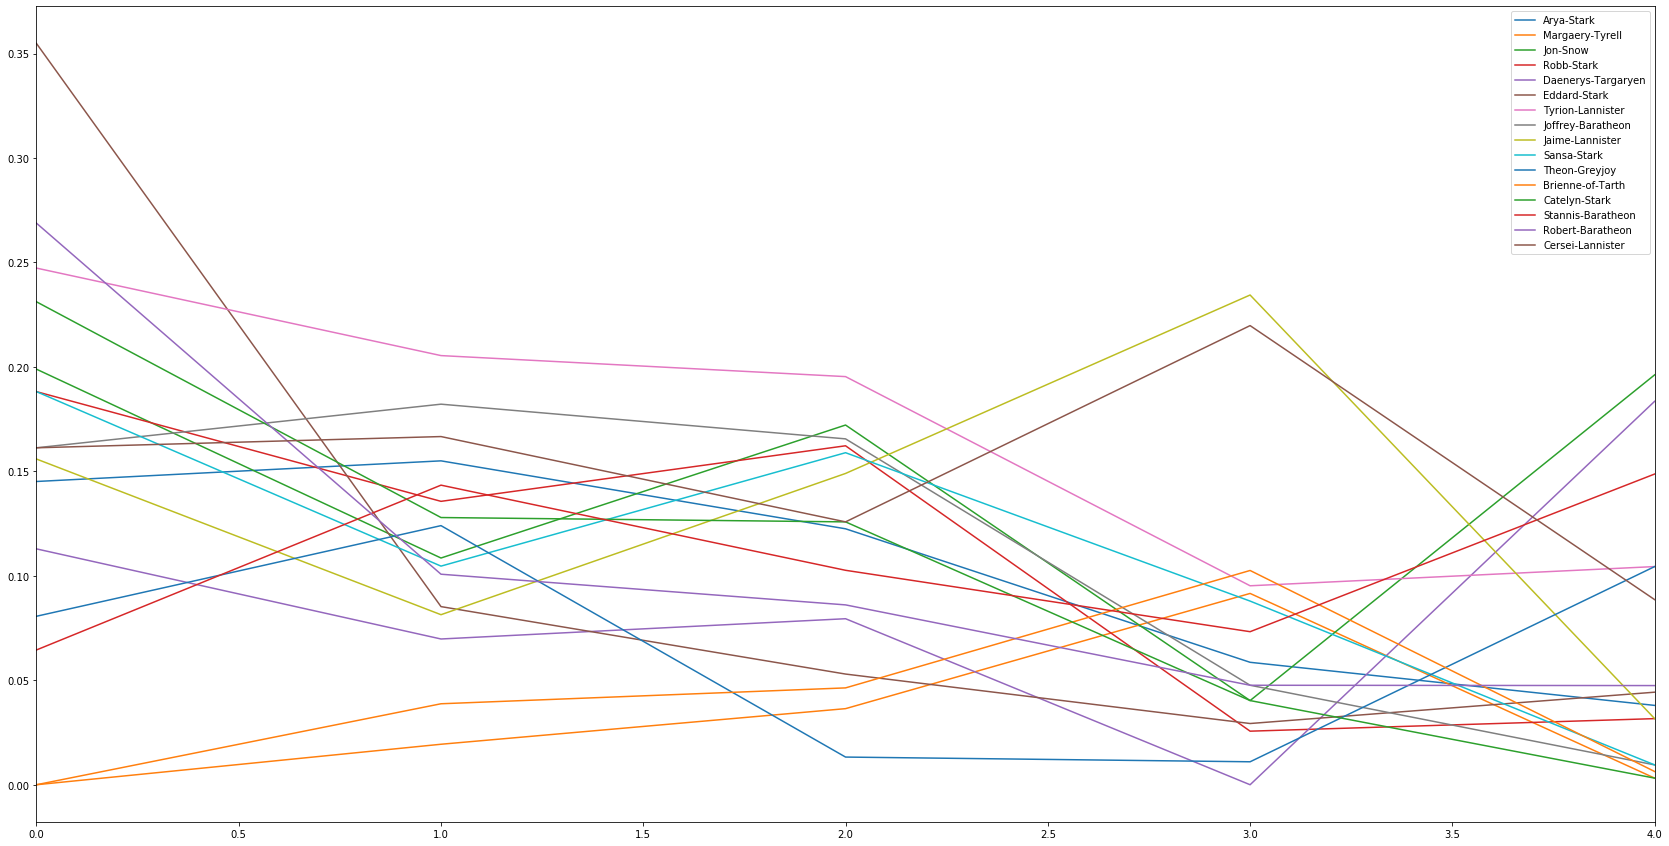

In [66]:
#ploting all the names that we got in the above code.
evol_df[list(set_of_char)].plot(figsize=(29,15))

## Weighted Degree


In [67]:
def weighted_degree(G, weight):
    result = dict()
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += n[2]['weight']
        result[node] = weight_degree
    return result

In [68]:
sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 1284),
 ('Robert-Baratheon', 941),
 ('Jon-Snow', 784),
 ('Tyrion-Lannister', 650),
 ('Sansa-Stark', 545),
 ('Bran-Stark', 531),
 ('Catelyn-Stark', 520),
 ('Robb-Stark', 516),
 ('Daenerys-Targaryen', 443),
 ('Arya-Stark', 430)]

## Betweenness Centarlity


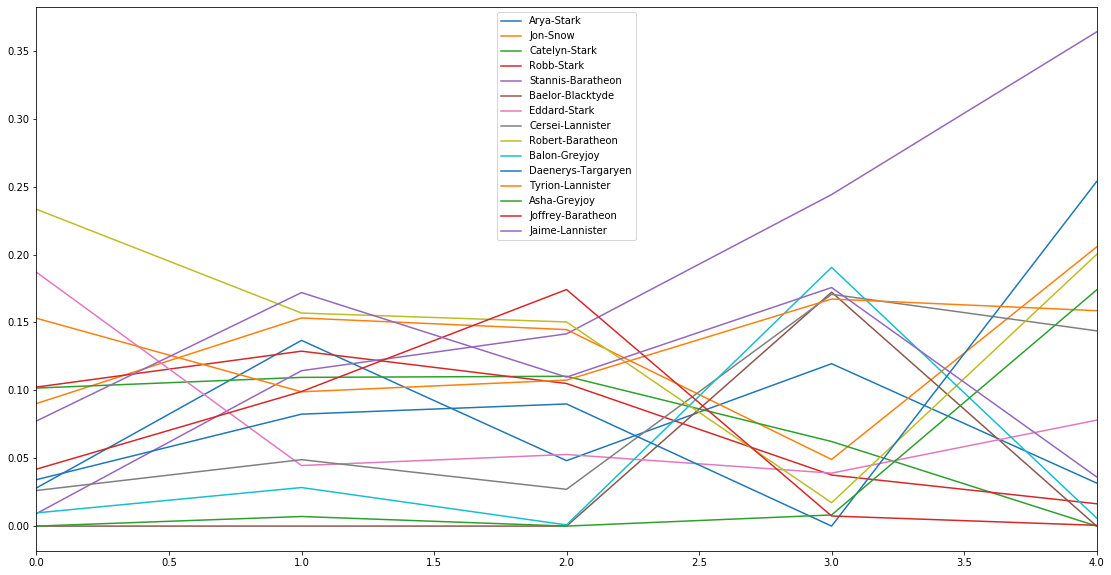

In [69]:
#Again finding the name of the charcter and ploting them into the graph.
#https://pynetwork.readthedocs.io/en/latest/influence_central.html

#Creating a list of betweenness centrality of all the books just like we did for degree centrality.
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

## Out of all the member we can see the increasing line of Stannis Baratheron.
<p><b>Let's Understand it properly by making an seprate subplots of all the Character.<b/><p/>

Evolution of the top characters in subplot: ['Arya-Stark', 'Samwell-Tarly', 'Jon-Snow', 'Brienne-of-Tarth', 'Bran-Stark', 'Robb-Stark', 'Cersei-Lannister', 'Stannis-Baratheon', 'Eddard-Stark', 'Daenerys-Targaryen', 'Robert-Baratheon', 'Tyrion-Lannister', 'Joffrey-Baratheon', 'Jaime-Lannister']


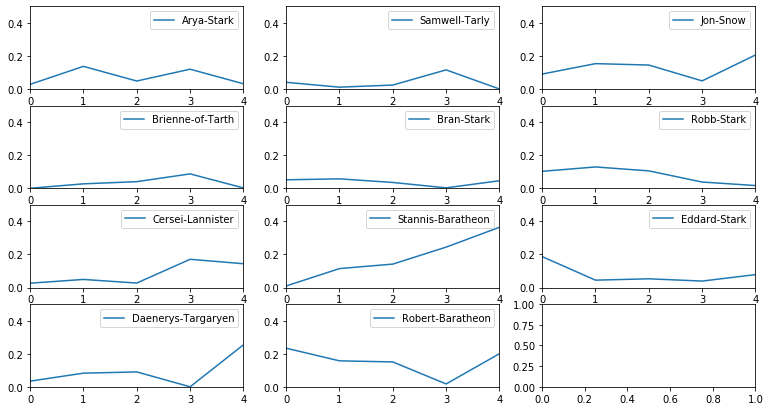

In [70]:
# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Plotting the evolution of the top characters in subplot
fig, axes = plt.subplots(nrows=4, ncols=3)
for i in range(3):
    for j in range(3):
        betweenness_evol_df.plot(ax=axes[i, j], y=list_of_char[i*3+j], figsize=(13, 7), ylim=(0, 0.5))
for j in range(2):
    betweenness_evol_df.plot(ax=axes[3, j], y=list_of_char[9+j], figsize=(13, 7), ylim=(0, 0.5))
    
print("Evolution of the top characters in subplot:", list_of_char)

## Eigen Vector

## 6. What's up with Stannis Baratheon?


In [71]:
#So by looking at subplot we can observe that Stannis Baratheon is totally increasing.

In [72]:
srt_deg_cen_b1_5()

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

In [73]:
srt_btw_cen_b1_5()

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627)]

#### Community detection in Networks

<p>We have use louvain community detection algorithm to find the modules in our graph.<p/>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

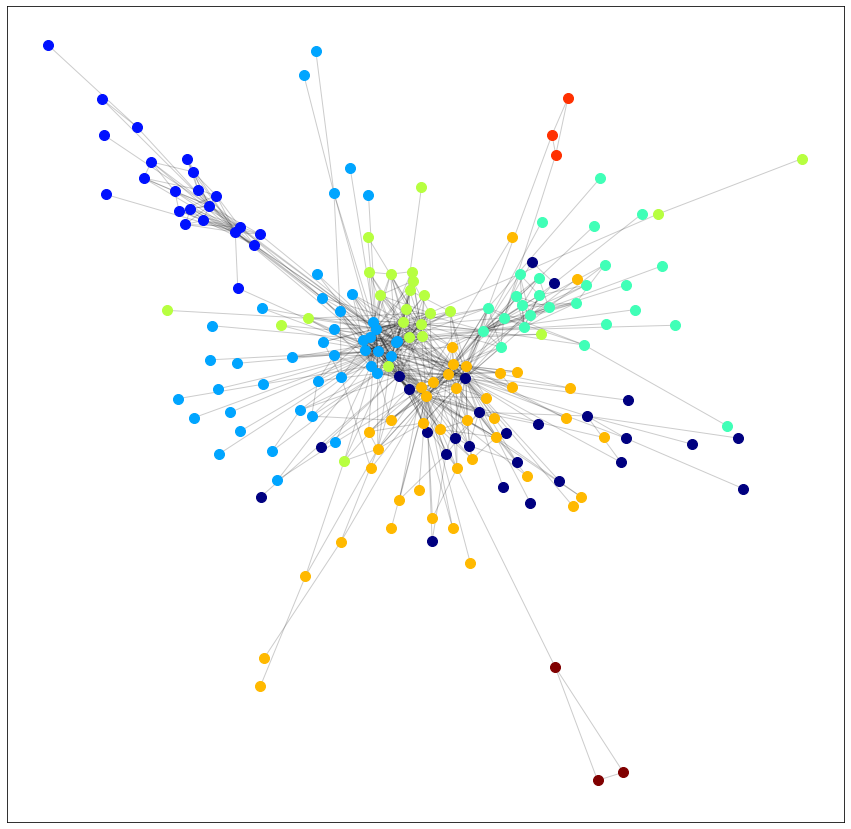

In [74]:
#it's a louvain community detection algorithm
#https://python-louvain.readthedocs.io/en/latest/

plt.figure(figsize=(15, 15))

partition = community.best_partition(G_book1)
size = (len(set(partition.values())))
pos = nx.spring_layout(G_book1)
count = 0
colors = [cm.jet(x) for x in np.linspace(0, 1, size)]
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_book1, pos, list_nodes, node_size = 100, node_color=colors[count])
    count = count + 1
nx.draw_networkx_edges(G_book1, pos, alpha=0.2)
plt.show()

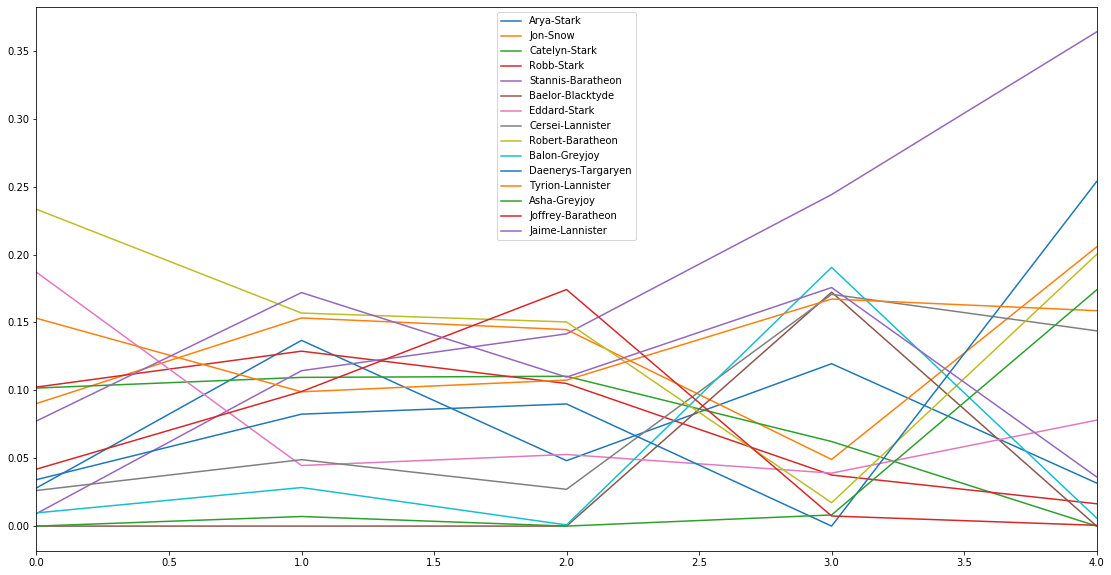

In [75]:
#Again finding the name of the charcter and ploting them into the graph.
#https://pynetwork.readthedocs.io/en/latest/influence_central.html

#Creating a list of betweenness centrality of all the books just like we did for degree centrality.
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

## 7. What does the Google PageRank algorithm tell us about Game of Thrones?
<p>We see a rise in the Stannis Baratheon over the books.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network.<p/>

## PageRank
<p>https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html<p/>

IndexError: list index out of range

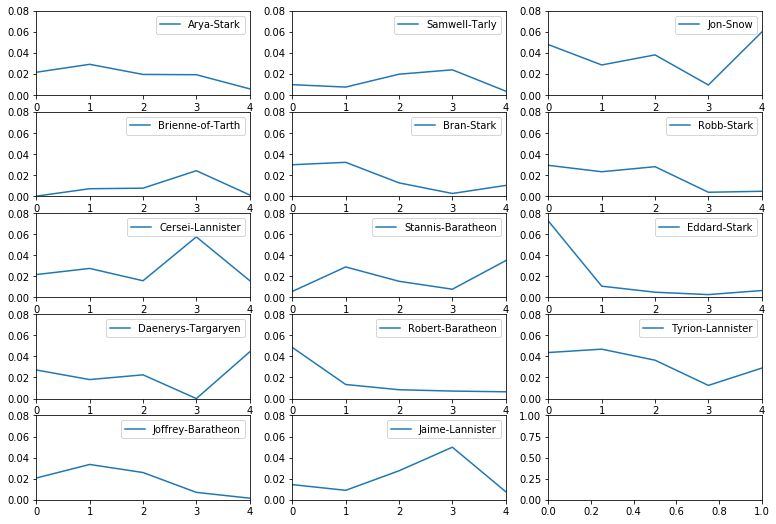

In [76]:
# Creating a list of pagerank of all the characters in all the books
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list of record
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book and ploting them.
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
# print(len(list_of_char))    14
# Plotting the top characters
fig, axes = plt.subplots(nrows=5, ncols=3)
for i in range(5):
    for j in range(3):
        pagerank_evol_df.plot(ax=axes[i, j], y=list_of_char[3*i+j], ylim=(0, 0.08), figsize=(13, 9))
# Although an IndexError will be thrown, but the output picture is correct

## 8. Correlation between different measures
<p>Till now We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network.</p>
<p>Let's look at the correlation between PageRank, betweenness centrality, Weighted degree and degree centrality for the fifth book using Pearson correlation.</p><br/>

<p><b>what is pearson correlation?<b/><p/><p>It Compute degree assortativity of graph. Assortativity measures the similarity of connections in the graph with respect to the node degree. <p/>

In [77]:
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'),
            weighted_degree(G_book1, 'weight'),
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr() # remember to transpose the dataframe, otherwise the correlation between characters will be computed. 

,0,1,2,3
0,1.000000,0.793372,0.421244,0.971493
1,0.793372,1.000000,0.494359,0.833816
2,0.421244,0.494359,1.000000,0.451896
3,0.971493,0.833816,0.451896,1.000000


## 9. Conclusion.
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality, weighted degree and degree centrality for the fifth book using Pearson correlation.</p>

In [78]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality, eigen vector and pagerank.
p_rank, b_cent, w_cent, d_cent = cor.idxmax(axis=1)

#According to degree centrality, Eddard Stark is the most important character initially in the books.
print("Important character form the book1:", w_cent)

# Printing out the top character accoding to the three measures
print("Important character form the book5:", p_rank, b_cent, d_cent)

Important character form the book1: Eddard-Stark
Important character form the book5: Jon-Snow Stannis-Baratheon Jon-Snow


## Thank You. 

Instagram Handle: https://bit.ly/yashinstagram

Linkedin Handle: https://bit.ly/yashlinkedin

Facebook Handle: https://bit.ly/yashfacebook

Twitter Handle: https://bit.ly/yashtwitter

Youtube Handle: https://bit.ly/yashchauhanyoutube

Medium Handle: https://bit.ly/yashmedium

Let's connect-collaborate-learn togehter!